## HW 5-1. Class Inheritance (60pt)

Instruction: 

컬러 이미지는 3차원으로 구성되어 있습니다. 주어진 그림파일은 (Height)$\times$ (Width) 해상도의 2차원 픽셀들과 색을 표현하기 위한 RGB 3개의 채널을 가지므로 총 3차원입니다: Height $\times$ Width $\times 3$. 따라서 이미지를 리스트로 변환하면 for loop로 이미지의 각 픽셀 값에 접근할 수 있습니다. 
  - Colored images is composed of three colors: Red, Green, and Blue. The shape of the image will be Height $\times$ Width $\times 3$. Thus, after converting the image to a list (nested list) we can access each pixel values by using for loops.

Class를 이용하여 컬러 이미지를 출력하는 `Screen` 클래스를 구현하세요.
  - Implement a `Screen` class that displays a colored image.

**(a)** class `Screen` (30pt):
  - 생성자 (constructor): instance variables 초기화
    - `brightness`: 이미지 색상의 밝기를 보정합니다 (정수 값으로 주어진다고 생각합니다). 
      - Brightness is a constant to increase (or decrease) the intensity of each pixel
    - `contrast`: 이미지 노출을 보정합니다 (밝고 어두운 색을 더 밝게, 더 어둡게 만드는 정도).
      - Contrast is a constant to change the difference between max and min pixel intensity 

  - `calibration()`
    - `image` (3차원 리스트) 를 입력으로 받습니다. (Take an `image` (3-dimensional list) as input)
    - 모든 pixel에 대해 `brightness`만큼 값을 더해 밝기를 조정합니다. 
    - 모든 pixel에 대해 `contrast`만큼 값을 곱해 노출을 조정합니다. 
    - 모든 pixel은 $[0,255]$ 사이의 integer로 표현되어야 하므로, int로 형 변환을 해주고 최대/최소를 체크하여 값을 조정해주어야 합니다. 
    - 모든 작업이 끝난 보정된 이미지를 return합니다. 
    - **note!**: nested list이므로 반드시 deepcopy를 사용해야 입력으로 받아온 이미지의 값을 바꾸지 않고 새로운, 보정된 이미지를 만들어낼 수 있습니다.
    - Every pixel's intensity is increased by amount of `brightness`, is multiplied by amount of `contrast` for adjusting brightness and contrast, respectively. In order to keep the intesnity values as "integers" in the valid range (0 to 255), the values should be converted into the integers in range $[0,255]$. Return the final calibrated image.
    - **note!**: image is given in a nested list, so you need to "deepcopy" if you don't intend to change the original input image.

  - `show()`
    - `image` (3차원 리스트) 를 입력으로 받습니다. (Take an `image` (3-dimensional list) as input)
    - 이미지를 `calibration()` method를 이용해 보정한 후, matplotlib를 이용해 시각화합니다. 이 부분은 주어진 코드를 그대로 사용합니다.
    - `image` should be calibrated by using `calibration()` method, then the image is displayed by using matplotlib (it is already implemented).


**note**: 원한다면 image를 리스트로 변환하지 않고 `ndarray` 형태로 사용해서 구현해도 됩니다.

In [ ]:
############ Colab의 경우, 아래 코드를 통해 'seoul.jpg' 이미지를 드라이브에 업로드하여 저장할 수 있습니다.
from google.colab import files
_ = files.upload() 

Saving seoul.jpg to seoul.jpg


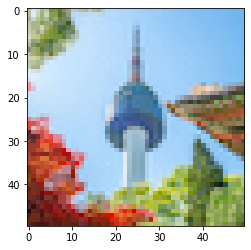

In [ ]:
# plot the image: 이미지를 출력해봅니다.
original_image = mpimg.imread('seoul.jpg')
plt.imshow(original_image, cmap='gray')

In [ ]:
# check your image: 이미지의 복사본을 만들어 값이 바뀌는 것을 방지합니다.
image = copy.deepcopy(original_image)

print('Before the calibration:')
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.show()

# convert the image into a nested list: 이미지를 list로 바꿉니다.
# 만일 ndarray로 다루고 싶다면 이 부분은 주석처리합니다. Make this line commented if you want to work with 'ndarray' format
image = image.tolist() 

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import copy

class Screen:
  ##### your code #####
  # constructor



  # calibration method





  #####

  def show(self, image):
    ### your code ###


    ###
    
    plt.imshow(image, cmap='gray') # matplotlib의 함수로서, 이미지를 출력합니다.

예시 결과:
```
image = copy.deepcopy(original_image)

print('Before the calibration:')
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.show()
```
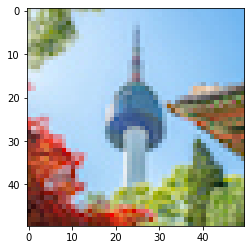

```
print('After the calibration:')
screen = Screen(30, 1.5)
plt.figure(2)
screen.show(image)
```
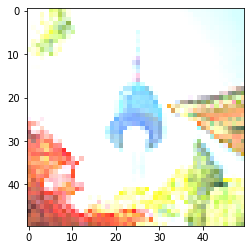



Before the calibration:


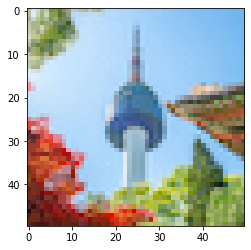

After the calibration:


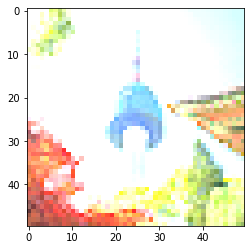

In [ ]:
# check your calibration image
image = copy.deepcopy(original_image)

print('Before the calibration:')
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.show()

# convert the image into a nested list: 이미지를 list로 바꿉니다.
# 만일 ndarray로 다루고 싶다면 이 부분은 주석처리합니다. Make this line commented if you want to work with 'ndarray' format
image = image.tolist() 

print('After the calibration:')
screen = Screen(30, 1.5)
plt.figure(2)
screen.show(image)

**(b)** class `GrayScreen` (30pt):

`Screen` 클래스를 상속받아 grayscale 이미지를 출력하는 클래스를 구현하세요.
  - Implementa a `GrayScreen` class that inherits from the `Screen` class to display a grayscaled image.

  - 생성자 (constructor): `Screen`의 생성자를 상속
  - `calibration()`
    - `Screen`의 `calibration()`을 그대로 수행한 후 아래의 추가 작업을 수행하여 grayscaled image를 만듭니다.
    - R, G, B 3개의 채널의 "평균" 값을 통해 grayscale image를 만듭니다: $(R+G+B)/3$
    - 변환된 grayscale image를 return합니다. 
    - Grayscaled image can be obtained by using `Screen`'s `calibration()` method first, then taking "average" of R,G,B intensity values. Return the final calibrated image. 
     
  - `show()`
    - `Screen` 클래스의 `show()` 메소드를 상속

In [ ]:
##### your code #####



#####

예시 결과:
```
image = copy.deepcopy(original_image)

print('Before the calibration:')
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.show()
```
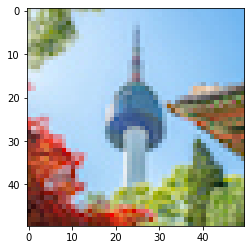

```
print('After the calibration:')
screen = Screen(30, 1.5)
plt.figure(2)
screen.show(image)
```
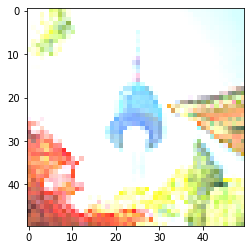

```
print('After the gray-calibration:')
grayscreen = GrayScreen(30, 1.5)
plt.figure(3)
grayscreen.show(image)
plt.show()
```
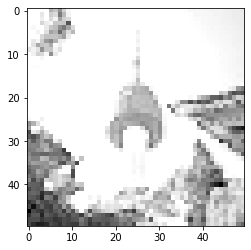

Before the calibration:


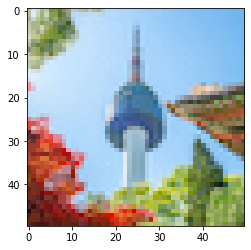

After the calibration:


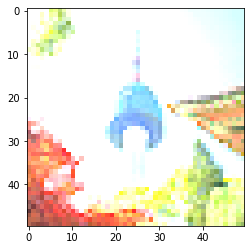

After the gray-calibration:


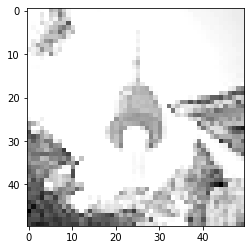

In [ ]:
# check your gray-scale calibration image
image = copy.deepcopy(original_image)

print('Before the calibration:')
plt.figure(1)
plt.imshow(image, cmap='gray')
plt.show()

# convert the image into a nested list: 이미지를 list로 바꿉니다.
# 만일 ndarray로 다루고 싶다면 이 부분은 주석처리합니다. Make this line commented if you want to work with 'ndarray' format
image = image.tolist() 

print('After the calibration:')
screen = Screen(30, 1.5)
plt.figure(2)
screen.show(image)
plt.show()

print('After the gray-calibration:')
grayscreen = GrayScreen(30, 1.5)
plt.figure(3)
grayscreen.show(image)
plt.show()

## HW 5-2. Regular Expressions (40pt)

Instruction: 
   
- **(a)** (20pt) 아래 주어진 `data`에 포함된 모든 복소수($a+bj$)를 출력하기 위해 정규 표현을 사용하세요. 
  - 복소수는 $a+bj$의 형식으로 표현합니다. $a$와 $b$는 모두 정수이고, $j$는 복소수의 기본 단위입니다.
  - `findall()`을 사용하여 모든 복소수 패턴을 찾으세요.
  - Find all "complex numbers" in `data`: complex number has a format $a+bj$ where $a,b$ are integer. Use regex and `findall()` for this. 

  - 예상 결과:
  ```
  ['12j', '-4j', '5-2j', '5+2j']
  ```    



In [ ]:
import re

# (a)
data = '12j fds -4j 5-2j fdsa 5+2j 6+2*'

### your code here ###


###

- **(b)** (20pt) 비밀번호의 유효성을 검증하기 위해 정규 표현식을 사용하세요. 
  - 비밀번호에는 대문자가 두개 이상, 숫자가 세개 이상 포함되어야 합니다. 주어진 문자열이 이를 만족하는지 정규표현식을 사용해 체크하세요. 
  - 각 조건을 따로 구분하여 별도의 정규표현식을 사용해도 됩니다.    
  - `findall()`을 사용하여 대문자, 숫자가 원하는 개수만큼 포함되어 있는지 찾을 수 있습니다. 
  - 유효성을 True/False로 체크하여 아래의 결과와 같이 출력합니다.
  - Check whether a given `passwd` is valid: a password should include at least two capital characters and at least three digit numbers. Use regex (for each condition) and `findall()` to check the `passwd` includes proper number of capital characters and digits. Check the validity in form of 'True/False' and print the result as follows.

  - 예상 결과: 두 예시에 대해 각각 확인해보세요.
  ```
  passwd = 'abcde12345'
  >>> 
  passwd abcde12345 is valid? False
  ```    
  ```
  passwd = 'Abc123deFg'
  >>> 
  passwd Abc123deFg is valid? True
  ```

In [ ]:
# (b)
passwd = 'abcde12345' # invalid password 예시
passwd = 'Abc123deFg' # valid password 예시

### your code here ###


###